# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int64
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [10]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [11]:
from PIL import Image

# reading an image and convert to array
myimage_moon = np.array(Image.open('img/moon.png'))
myimage = np.array(Image.open('img/margueritte.jpg'))

# write an image (alternative format) from an array
#Image.fromarray(myimage).save('img/moon.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

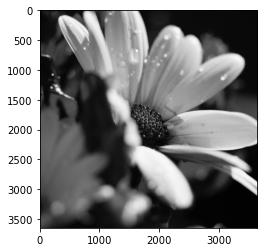

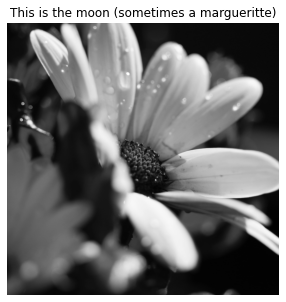

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is the moon (sometimes a margueritte)') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

## Exercice 1
In this exercice, we work with image `img/moon.png`. If possible give two solutions : one with loops (for, while, ...) and one without loops. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [13]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    myimage = np.array(Image.open(fname))




2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [14]:
def countPixels(I,k):
    """ Array*int -> int"""
    return np.sum(I==k)


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

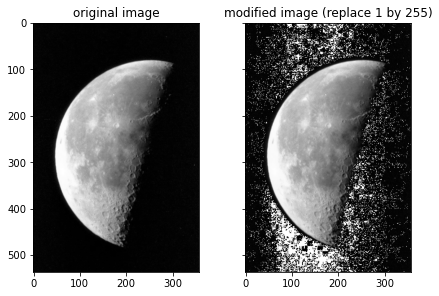

In [15]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    return np.where(I==k1,k2,I)

axs = (plt.figure(constrained_layout=True)
       .subplots(1, 2, sharex=True, sharey=True))
axs[0].imshow(myimage_moon)
axs[0].set_title('original image')
axs[1].imshow(replacePixels(myimage_moon,1,255))
axs[1].set_title('modified image (replace 1 by 255)')


plt.show()

4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

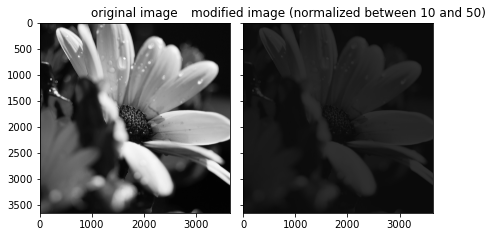

In [16]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    return ( (I-np.min(I))*((k2-k1)/(np.max(I)-np.min(I)))+k1 ).astype(int)

def normalizeImageSigmoid(I,k1,k2):
    """ Array*int*int -> Array """
    tmp_tab=I/256.0
    Beta = np.median(tmp_tab)
    alpha =(np.max(tmp_tab)-np.min(tmp_tab)/6.0)
    res=((k2-k1)/256.0) * (1/(1+np.exp(-((tmp_tab-Beta)/alpha ) ))) +k1/256.0
    print(np.max(( res*256.0).astype(int)))
    return ( res*256.0).astype(int)

axs = (plt.figure(constrained_layout=True)
       .subplots(1, 2, sharex=True, sharey=True))
axs[0].imshow(myimage)
axs[0].set_title('original image')
axs[1].imshow(normalizeImage(myimage,10,50),vmin=0,vmax=255)
axs[1].set_title('modified image (normalized between 10 and 50)')

plt.show()

5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

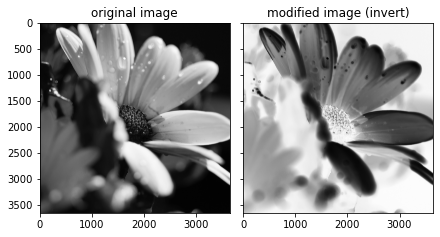

In [17]:
def inverteImage(I):
    """ Array -> Array """
    return 255-I

axs = (plt.figure(constrained_layout=True)
       .subplots(1, 2, sharex=True, sharey=True))
axs[0].imshow(myimage)
axs[0].set_title('original image')
axs[1].imshow(inverteImage(myimage))
axs[1].set_title('modified image (invert)')

plt.show()

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

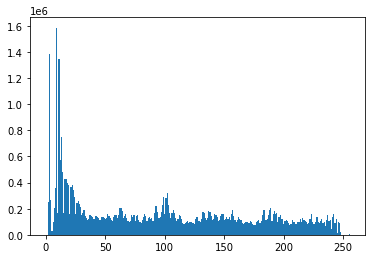

In [19]:
def computeHistogram(I):
    """ Array -> list[int] """
    #return np.histogram(I,range(256))
    res=np.zeros(256)
    for i in I.ravel():
        res[i]+=1
    return res


def plotHistogram(I):
    """ Array -> None """
    plt.bar(range(256),computeHistogram(I), width=1.0)

plotHistogram(myimage)




7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

Text(0.5, 1.0, 'modified image (threshold at 50)')

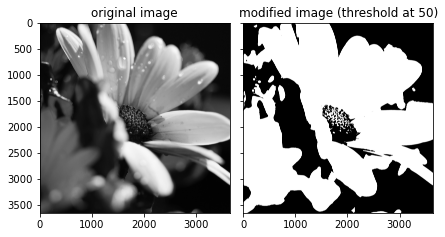

In [20]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    return np.where(I<s,0,255)

axs = (plt.figure(constrained_layout=True)
       .subplots(1, 2, sharex=True, sharey=True))
axs[0].imshow(myimage)
axs[0].set_title('original image')
axs[1].imshow(thresholdImage(myimage,50))
axs[1].set_title('modified image (threshold at 50)')

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

Text(0.5, 1.0, 'inverted image histogram')

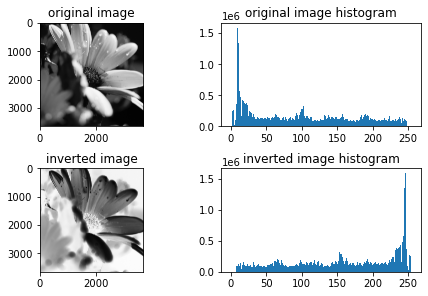

In [21]:
axs = (plt.figure(constrained_layout=True)
       .subplots(2, 2, sharex=False, sharey=False))
axs[0][0].imshow(myimage)
axs[0][0].set_title('original image')

axs[0][1].hist(myimage.ravel(),range(256))
axs[0][1].set_title('original image histogram')

axs[1][0].imshow(inverteImage(myimage))
axs[1][0].set_title('inverted image')

axs[1][1].hist(inverteImage(myimage).ravel(),range(256))
axs[1][1].set_title('inverted image histogram')


9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

Text(0.5, 1.0, 'corresponding histogram')

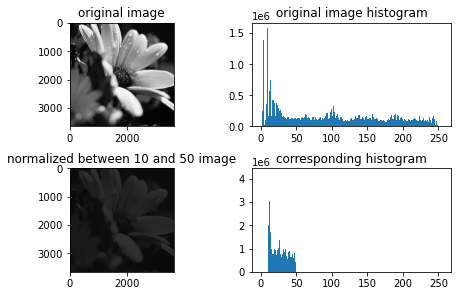

In [22]:
axs = (plt.figure(constrained_layout=True)
       .subplots(2, 2, sharex=False, sharey=False))
axs[0][0].imshow(myimage)
axs[0][0].set_title('original image')

axs[0][1].hist(myimage.ravel(),range(256))
axs[0][1].set_title('original image histogram')

axs[1][0].imshow(normalizeImage(myimage,10,50),vmin=0,vmax=255)
axs[1][0].set_title('normalized between 10 and 50 image')

axs[1][1].hist(normalizeImage(myimage,10,50).ravel(),range(256))
axs[1][1].set_title('corresponding histogram')

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

Text(0.5, 1.0, 'treshold over 127 histogram')

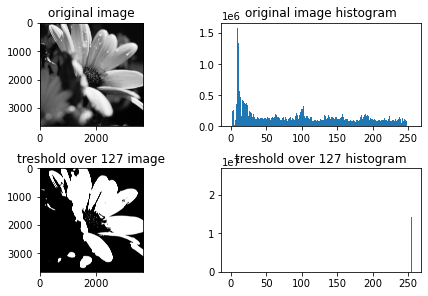

In [23]:
axs = (plt.figure(constrained_layout=True)
       .subplots(2, 2, sharex=False, sharey=False))
axs[0][0].imshow(myimage)
axs[0][0].set_title('original image')

axs[0][1].hist(myimage.ravel(),range(256))
axs[0][1].set_title('original image histogram')

axs[1][0].imshow(thresholdImage(myimage,127),vmin=0,vmax=255)
axs[1][0].set_title('treshold over 127 image')

axs[1][1].hist(thresholdImage(myimage,127).ravel(),range(256))
axs[1][1].set_title('treshold over 127 histogram')

## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 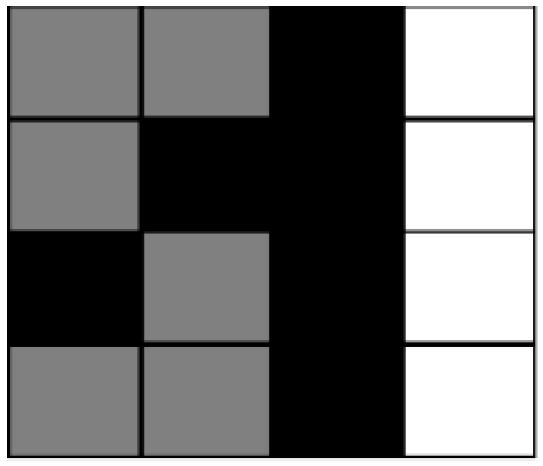 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

Text(0.5, 1.0, 'corresponding histogram')

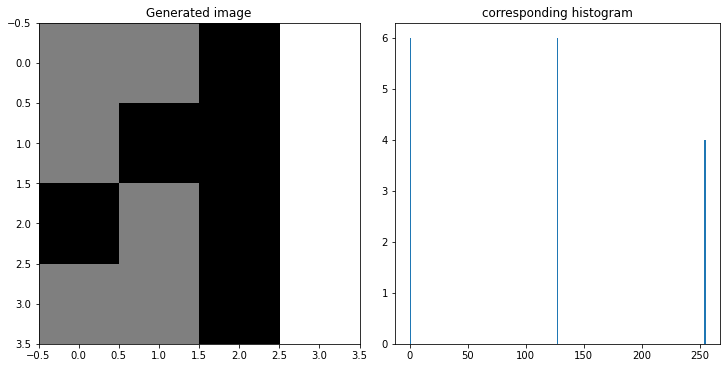

In [26]:
# on pourrait générer l'image à l'aide de numpy mais c'est assez couteux en mémoire alors ici, on peut privilégier un tableau remplit à la main
# code avec numpy :
# img = np.vstack((np.ones((4,2))*127, np.zeros((4,1)), np.ones((4,1))*255))
# img[2,0] = 127
# img[1,1] = 127

axs = (plt.figure(constrained_layout=True,figsize=(w/40,h/80))
       .subplots(1, 2))
axs[0].imshow(np.array([ [127,127,0,255], [127,0,0,255], [0,127,0,255], [127,127,0,255] ]))
axs[0].set_title('Generated image')
axs[1].hist(np.array([ [127,127,0,255], [127,0,0,255], [0,127,0,255], [127,127,0,255] ]).ravel(),range(256))
axs[1].set_title('corresponding histogram')

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

73.57841991090434
26.680010864889628
26.634233796595982


Text(0.5, 1.0, 'corresponding histogram')

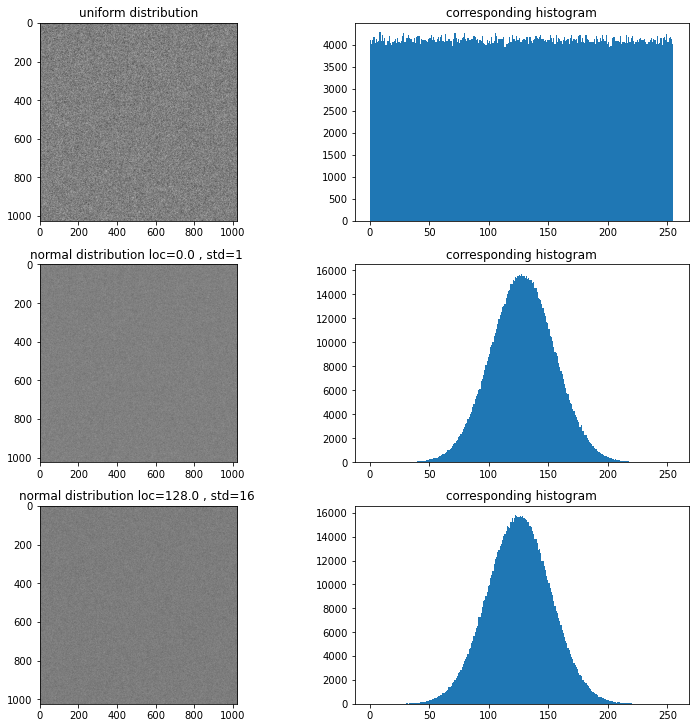

In [27]:
axs = (plt.figure(constrained_layout=True,figsize=(w/40,h/40))
       .subplots(3, 2, sharex=False, sharey=False))

dimension=1024
tab_uniforme=np.random.uniform(0,255,(dimension,dimension)).astype(int)
tab_normale_10=np.random.normal(0,1,(dimension,dimension))
tab_normale_128=np.random.normal(128,16,(dimension,dimension))

axs[0][0].imshow(tab_uniforme)
axs[0][0].set_title('uniform distribution')

axs[0][1].hist(tab_uniforme.ravel(),range(256))
print(np.std(tab_uniforme))
axs[0][1].set_title('corresponding histogram')

axs[1][0].imshow(normalizeImage(tab_normale_10,1,255).astype(int))
axs[1][0].set_title('normal distribution loc=0.0 , std=1 ')

axs[1][1].hist(normalizeImage(tab_normale_10,1,255).astype(int).ravel(),range(256))
print(np.std(normalizeImage(tab_normale_10,1,255).astype(int)))
axs[1][1].set_title('corresponding histogram')

axs[2][0].imshow(normalizeImage(tab_normale_128,1,255).astype(int))
axs[2][0].set_title('normal distribution loc=128.0 , std=16 ')

axs[2][1].hist(normalizeImage(tab_normale_128,1,255).astype(int).ravel(),range(256))
print(np.std(normalizeImage(tab_normale_128,0,255).astype(int)))
axs[2][1].set_title('corresponding histogram')

Les figures ci-dessus représentent le bruit généré en utilisant différentes distributions. (La première image une distribution uniforme et les autres normale)


On peut Observer deux choses. 

D'abord  première image (générée avec une distribution uniforme) semble être beaucoup plus contrastée que les deux autres, qui semblent "lissées" avec essentiellement des valeurs de gris.
Cela est dû aux répartitions utilisées. En effet avec une répartition "normale" $P(112\le X \le 144)=69\%$ on a donc environ 70% des pixels qui sont des niveaux de gris. On voit bien ce phénomène avec l'histogramme correspondant. Avec une distribution uniforme on a statistiquement autant de pixels blancs,gris et noirs. Cela se voit sur l'histogramme qui ne forme qu'un seul niveau. Cette hypothèse se confirme avec le calcul de l'écart-type sur ces images (de taille 4096*4096 pour une plus grande précision):
$$\sigma_{uniforme}=73.63$$
$$\sigma_{Normale(0,1)}=23.49$$
$$\sigma_{Normale(128,16)}=24.22$$

On voit que l'écart-type est beaucoup plus élevé avec la loi uniforme, il y a beaucoup plus de pixels avec des valeurs très différentes sur cette image que sur les images générées avec une loi normale.

Ensuite on peut observer que bien que les images générées avec une distriubution normale aient été normalisés, les histogrammes correspondants ne sont pas centrés au même endroit et leur écart-types sont différents. Cela est dû à la différence de paramètres sigma $\N({\phi,\sigma})$ lors de la génération des points. plus $\sigma$ est grand et plus l'étendue des valeurs des points générés est grande donc il n'est pas anormal que l'écart-type des points générés par la la distribution normale de paramètres (128,16) soit sensiblement plus élevé que celui de la loi N(0,1). 

## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.png`. 

1. Read and display this image

Text(0.5, 1.0, 'corresponding histogram')

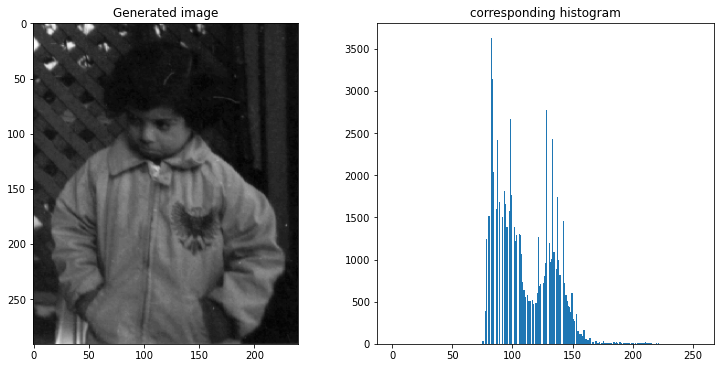

In [28]:
myimage_pout = np.array(Image.open('img/pout.png'))




axs = (plt.figure(constrained_layout=True,figsize=(w/40,h/80))
       .subplots(1, 2))
axs[0].imshow(myimage_pout)
axs[0].set_title('Generated image')
axs[1].hist(myimage_pout.ravel(),range(256))
axs[1].set_title('corresponding histogram')

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

L'imge ci dessus paraît lissée, son contraste est faible. Cela est dû au fait que l'image est essentiellement composée de niveaux de gris très rapprochés entre 75 et 150, comme on peut le constater sur l'histogramme. Pour augmenter son contraste on peut égaliser l'histogramme.

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

In [29]:
def cumulativeHistogram(I):
    """ Array -> list[int] """
    return np.cumsum(computeHistogram(I))

def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    return 255*h[I]/(I.shape[0]*I.shape[1]) 

def gammaCorrection(I,g):
    """ Array * float -> Array """
    return 255*np.power(I/255,g)


23.180962561967927
72.68149807550225
74.51599141130018


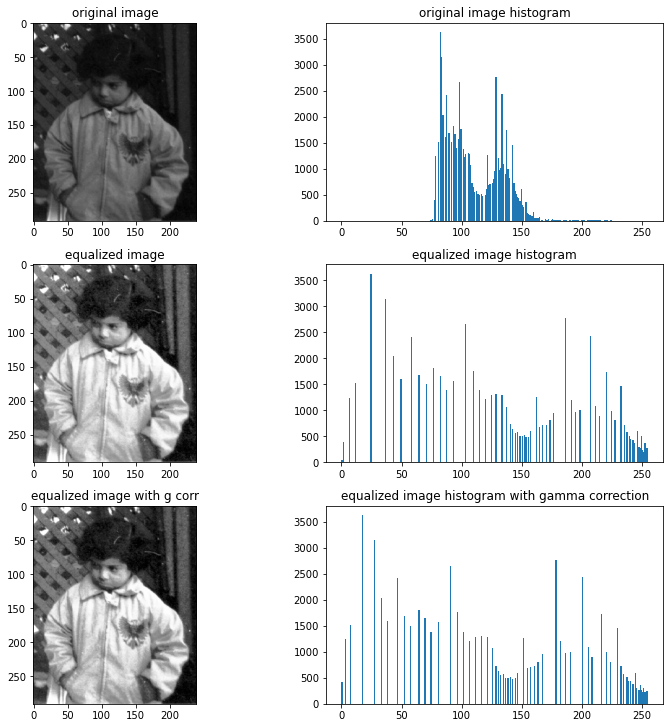

In [30]:
axs = (plt.figure(constrained_layout=True,figsize=(w/40,h/40))
       .subplots(3, 2, sharex=False, sharey=False))

axs[0][0].imshow(myimage_pout)
axs[0][0].set_title('original image')

axs[0][1].hist(myimage_pout.ravel(),range(256))
axs[0][1].set_title('original image histogram')

axs[1][0].imshow(histogramEqualization(myimage_pout,cumulativeHistogram(myimage_pout)),vmin=0,vmax=255)
axs[1][0].set_title('equalized image')

axs[1][1].hist(histogramEqualization(myimage_pout,cumulativeHistogram(myimage_pout)).ravel(),range(256))
axs[1][1].set_title('equalized image histogram')

axs[2][0].imshow(gammaCorrection(histogramEqualization(myimage_pout,cumulativeHistogram(myimage_pout)),1.15),vmin=0,vmax=255)
axs[2][0].set_title('equalized image with g corr')

axs[2][1].hist(gammaCorrection(histogramEqualization(myimage_pout,cumulativeHistogram(myimage_pout)),1.15).ravel(),range(256))
axs[2][1].set_title('equalized image histogram with gamma correction')



print(np.std(myimage_pout))
print(np.std(histogramEqualization(myimage_pout,cumulativeHistogram(myimage_pout))))
print(np.std(gammaCorrection(histogramEqualization(myimage_pout,cumulativeHistogram(myimage_pout)),1.15)))

L'image ci-dessus représente les différents stades de traitement d'une image dont le contraste était faible.

Dans un premier temps nous avons pu constater que le contraste de l'image est faible avec son histograme. En effet ses valeurs sont essentiellement entre 75 et 150. Nous avons donc choisi d'égaliser l'histograme afin d'avoir un plus grand spectre de couleurs et donc augmenter le contraste (figure 2). Après Cette transformation nous avons choisi de faire une correction gamma avec $\gamma = 1.15$ (figure 3), ce qui revient à une transformation exponentielle de l'image.
Cela a permis de renforcer les couleurs sombres de l'image.

Ces intuitions se confirment en calculant l'écart-type de l'image:

$$\sigma_{originale}=23$$
$$\sigma_{fig.2}=72.6$$
$$\sigma_{fig.3}=74.5$$

l'écart-type a bien augmenté avec les transformation successives

# Equalization on color images

## Independent histogram equalization based on color channel


Text(0.5, 1.0, 'corresponding histogram')

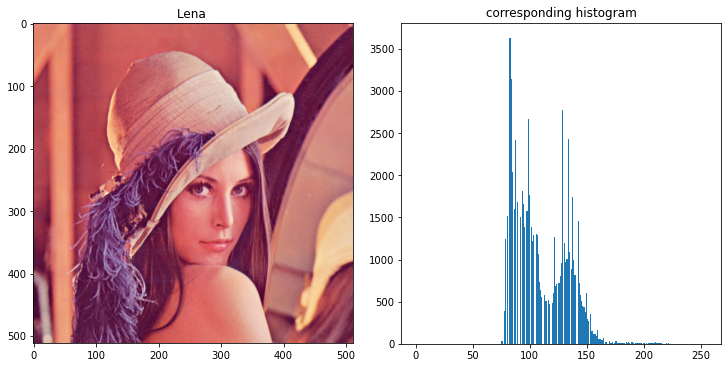

In [31]:
lena = np.array(Image.open('img/lena_std.tiff'))

axs = (plt.figure(constrained_layout=True,figsize=(w/40,h/80))
       .subplots(1, 2))
axs[0].imshow(lena)
axs[0].set_title('Lena ')
axs[1].hist(myimage_pout.ravel(),range(256))
axs[1].set_title('corresponding histogram')



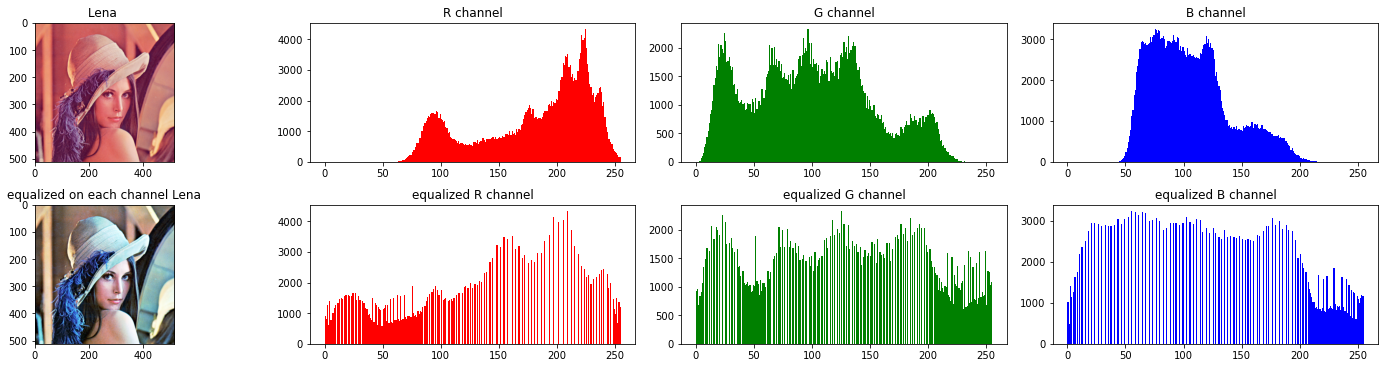

In [32]:


tmp_lena=lena.copy()
tmp_lena[:,:,0]=histogramEqualization(tmp_lena[:,:,0],cumulativeHistogram(tmp_lena[:,:,0]))
tmp_lena[:,:,1]=histogramEqualization(tmp_lena[:,:,1],cumulativeHistogram(tmp_lena[:,:,1]))
tmp_lena[:,:,2]=histogramEqualization(tmp_lena[:,:,2],cumulativeHistogram(tmp_lena[:,:,2]))

axs = (plt.figure(constrained_layout=True,figsize=(w/20,h/80)).subplots(2, 4))

axs[0][0].imshow(lena)
axs[0][0].set_title('Lena ')
axs[0][1].hist(lena[:,:,0].ravel(),range(256),color='red')
axs[0][1].set_title('R channel')
axs[0][2].hist(lena[:,:,1].ravel(),range(256),color='green')
axs[0][2].set_title('G channel')
axs[0][3].hist(lena[:,:,2].ravel(),range(256),color='blue')
axs[0][3].set_title('B channel')

axs[1][0].imshow(tmp_lena)
axs[1][0].set_title('equalized on each channel Lena')
axs[1][1].hist(tmp_lena[:,:,0].ravel(),range(256),color='red')
axs[1][1].set_title('equalized R channel')
axs[1][2].hist(tmp_lena[:,:,1].ravel(),range(256),color='green')
axs[1][2].set_title('equalized G channel')
axs[1][3].hist(tmp_lena[:,:,2].ravel(),range(256),color='blue')
axs[1][3].set_title('equalized B channel')

def ImageEqualizationRGB(I):
    """ Array -> Array """
    tmp=I.copy()
    tmp[:,:,0]=histogramEqualization(tmp[:,:,0],cumulativeHistogram(tmp[:,:,0]))
    tmp[:,:,1]=histogramEqualization(tmp[:,:,1],cumulativeHistogram(tmp[:,:,1]))
    tmp[:,:,2]=histogramEqualization(tmp[:,:,2],cumulativeHistogram(tmp[:,:,2]))
    return tmp

Text(0.5, 1.0, 'equalized Lena ')

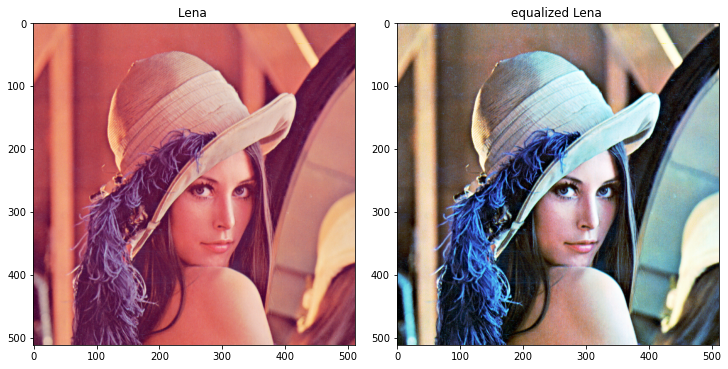

In [33]:
axs = (plt.figure(constrained_layout=True,figsize=(w/40,h/40))
       .subplots(1, 2))
axs[0].imshow(lena)
axs[0].set_title('Lena ')
axs[1].imshow(ImageEqualizationRGB(lena))
axs[1].set_title('equalized Lena ')

## Histogram equalization based on average value of color channel

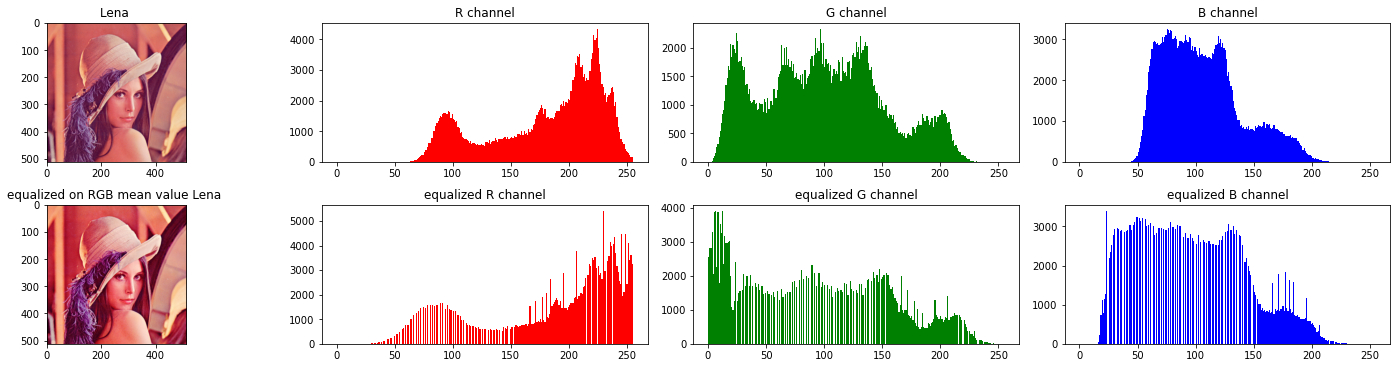

In [34]:

tmp_lena_m=lena.copy()

tmp_mean_hist0 = cumulativeHistogram(tmp_lena_m[:,:,0])
tmp_mean_hist1 = cumulativeHistogram(tmp_lena_m[:,:,1])
tmp_mean_hist2 = cumulativeHistogram(tmp_lena_m[:,:,2])

tmp_mean_hist =((tmp_mean_hist0+tmp_mean_hist1+tmp_mean_hist2)/3.0).astype(int)

tmp_lena_m[:,:,0]=histogramEqualization(tmp_lena_m[:,:,0],tmp_mean_hist )
tmp_lena_m[:,:,1]=histogramEqualization(tmp_lena_m[:,:,1],tmp_mean_hist)
tmp_lena_m[:,:,2]=histogramEqualization(tmp_lena_m[:,:,2],tmp_mean_hist)

axs = (plt.figure(constrained_layout=True,figsize=(w/20,h/80)).subplots(2, 4))

axs[0][0].imshow(lena)
axs[0][0].set_title('Lena ')
axs[0][1].hist(lena[:,:,0].ravel(),range(256),color='red')
axs[0][1].set_title('R channel')
axs[0][2].hist(lena[:,:,1].ravel(),range(256),color='green')
axs[0][2].set_title('G channel')
axs[0][3].hist(lena[:,:,2].ravel(),range(256),color='blue')
axs[0][3].set_title('B channel')

axs[1][0].imshow(tmp_lena_m)
axs[1][0].set_title('equalized on RGB mean value Lena ')
axs[1][1].hist(tmp_lena_m[:,:,0].ravel(),range(256),color='red')
axs[1][1].set_title('equalized R channel')
axs[1][2].hist(tmp_lena_m[:,:,1].ravel(),range(256),color='green')
axs[1][2].set_title('equalized G channel')
axs[1][3].hist(tmp_lena_m[:,:,2].ravel(),range(256),color='blue')
axs[1][3].set_title('equalized B channel')

def ImageEqualizationRGBMean(I):
    """ Array -> Array """
    tmp=I.copy()
    tmp_mean_hist =((cumulativeHistogram(tmp[:,:,0])+cumulativeHistogram(tmp[:,:,1])+cumulativeHistogram(tmp[:,:,2]))/3.0).astype(int)
    tmp[:,:,0]=histogramEqualization(tmp[:,:,0],tmp_mean_hist )
    tmp[:,:,1]=histogramEqualization(tmp[:,:,1],tmp_mean_hist)
    tmp[:,:,2]=histogramEqualization(tmp[:,:,2],tmp_mean_hist)
    return tmp

Text(0.5, 1.0, 'equalized Lena ')

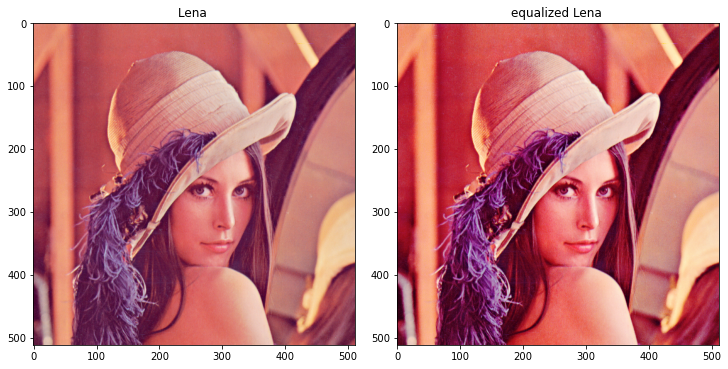

In [35]:
axs = (plt.figure(constrained_layout=True,figsize=(w/40,h/40))
       .subplots(1, 2))
axs[0].imshow(lena)
axs[0].set_title('Lena ')
axs[1].imshow(ImageEqualizationRGBMean(lena))
axs[1].set_title('equalized Lena ')

## HSI, Hue Saturation and Intensity. (Gonzalez and Woods)

In [36]:
def RGB2HSV(RGB):
    RGB_normalized = RGB / 255.0                           # Normalize values to 0.0 - 1.0 (float64)
    R = RGB_normalized[:, :, 0]                            # Split channels
    G = RGB_normalized[:, :, 1]
    B = RGB_normalized[:, :, 2]
    
    v_max = np.max(RGB_normalized, axis=2)                 # Compute max, min & chroma
    v_min = np.min(RGB_normalized, axis=2)
    C = v_max - v_min                                      
    
    hue_defined = C > 0                                    # Check if hue can be computed
    
    r_is_max = np.logical_and(R == v_max, hue_defined)     # Computation of hue depends on max
    g_is_max = np.logical_and(G == v_max, hue_defined)
    b_is_max = np.logical_and(B == v_max, hue_defined)
    
    H = np.zeros_like(v_max)                               # Compute hue
    H_r = ((G[r_is_max] - B[r_is_max]) / C[r_is_max]) % 6
    H_g = ((B[g_is_max] - R[g_is_max]) / C[g_is_max]) + 2
    H_b = ((R[b_is_max] - G[b_is_max]) / C[b_is_max]) + 4
    
    H[r_is_max] = H_r
    H[g_is_max] = H_g
    H[b_is_max] = H_b
    H *= 60
    
    V = v_max                                              # Compute value
    
    sat_defined = V > 0
    
    S = np.zeros_like(v_max)                               # Compute saturation
    S[sat_defined] = C[sat_defined] / (V[sat_defined]+1e-10)
    
    return np.dstack((H, S, V))

def RGB2HSI(RGB):
    RGB_normalized = RGB / 255.0                           # Normalize values to 0.0 - 1.0 (float64)
    R = RGB_normalized[:, :, 0]                            # Split channels
    G = RGB_normalized[:, :, 1]
    B = RGB_normalized[:, :, 2]
    
    v_max = np.max(RGB_normalized, axis=2)                 # Compute max, min & chroma
    v_min = np.min(RGB_normalized, axis=2)
    C = v_max - v_min                                      
    
    hue_defined = C > 0                                    # Check if hue can be computed
    
    r_is_max = np.logical_and(R == v_max, hue_defined)     # Computation of hue depends on max
    g_is_max = np.logical_and(G == v_max, hue_defined)
    b_is_max = np.logical_and(B == v_max, hue_defined)
    
    H = np.zeros_like(v_max)                               # Compute hue
    H_r = ((G[r_is_max] - B[r_is_max]) / C[r_is_max]) % 6
    H_g = ((B[g_is_max] - R[g_is_max]) / C[g_is_max]) + 2
    H_b = ((R[b_is_max] - G[b_is_max]) / C[b_is_max]) + 4
    
    H[r_is_max] = H_r
    H[g_is_max] = H_g
    H[b_is_max] = H_b
    H *= 60
    
    I = (R+G+B)/3.0                                             # Compute value
    
    #sat_defined = np.isclose(I,np.zeros(I.shape),1e-5)

    S=np.where(np.isclose(I,np.zeros(I.shape),1e-5),0,1-(v_min/I))

    
    
    return np.dstack((H, S, I))
    

def HSV2RGB(HSV):
    H = HSV[:, :, 0]                                           # Split attributes
    S = HSV[:, :, 1]
    V = HSV[:, :, 2]
    
    C = V * S                                                  # Compute chroma
    
    H_ = H / 60.0                                              # Normalize hue
    X  = C * (1 - np.abs(H_ % 2 - 1))                          # Compute value of 2nd largest color
    
    H_0_1 = np.logical_and(0 <= H_, H_<= 1)                    # Store color orderings
    H_1_2 = np.logical_and(1 <  H_, H_<= 2)
    H_2_3 = np.logical_and(2 <  H_, H_<= 3)
    H_3_4 = np.logical_and(3 <  H_, H_<= 4)
    H_4_5 = np.logical_and(4 <  H_, H_<= 5)
    H_5_6 = np.logical_and(5 <  H_, H_<= 6)
    
    R1G1B1 = np.zeros_like(HSV)                                # Compute relative color values
    Z = np.zeros_like(H)
    
    R1G1B1[H_0_1] = np.dstack((C[H_0_1], X[H_0_1], Z[H_0_1]))  
    R1G1B1[H_1_2] = np.dstack((X[H_1_2], C[H_1_2], Z[H_1_2]))
    R1G1B1[H_2_3] = np.dstack((Z[H_2_3], C[H_2_3], X[H_2_3]))
    R1G1B1[H_3_4] = np.dstack((Z[H_3_4], X[H_3_4], C[H_3_4]))
    R1G1B1[H_4_5] = np.dstack((X[H_4_5], Z[H_4_5], C[H_4_5]))
    R1G1B1[H_5_6] = np.dstack((C[H_5_6], Z[H_5_6], X[H_5_6]))
    
    m = V - C
    RGB = R1G1B1 + np.dstack((m, m, m))                        # Adding the value correction
    
    return RGB

def HSI2RGB(HSI):
    H = HSI[:, :, 0]                                           # Split attributes
    S = HSI[:, :, 1]
    I = HSI[:, :, 2]

    R=np.zeros_like(H)
    G=np.zeros_like(H)
    B=np.zeros_like(H)

    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            if H[i,j]>=0 and H[i,j]<120:
                B[i,j]=I[i,j]*(1-S[i,j])
                R[i,j]=I[i,j]*(1+(S[i,j]*np.cos(H[i,j]*np.pi/180))/(np.cos((60-H[i,j])*np.pi/180)))
                G[i,j]=3*I[i,j]-(R[i,j]+B[i,j])
            elif H[i,j]>=120 and H[i,j]<240:
                H[i,j]=H[i,j]-120
                R[i,j]=I[i,j]*(1-S[i,j])
                G[i,j]=I[i,j]*(1+(S[i,j]*np.cos(H[i,j]*np.pi/180))/(np.cos((60-H[i,j])*np.pi/180)))
                B[i,j]=3*I[i,j]-(R[i,j]+G[i,j])
            else:
                H[i,j]=H[i,j]-240
                G[i,j]=I[i,j]*(1-S[i,j])
                B[i,j]=I[i,j]*(1+(S[i,j]*np.cos(H[i,j]*np.pi/180))/(np.cos((60-H[i,j])*np.pi/180)))
                R[i,j]=3*I[i,j]-(G[i,j]+B[i,j])
                          

    
    return np.dstack((R,G,B))


def RGB2YCBCR(I):
    tmp=I.copy()
    R=tmp[:,:,0]
    G=tmp[:,:,1]
    B=tmp[:,:,2]

    Y=16+((65.738*R+129.057*G+25.064*B)/256)
    Cb=128+((-37.945*R-74.494*G+112.439*B)/256)
    Cr=128+((112.439*R-94.154*G-18.285*B)/256)

    return np.dstack((Y,Cb,Cr))

def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return ycbcr.astype(np.uint8)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float16)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.clip(rgb, 0, 255, out=rgb)
    return rgb.astype(np.uint8)



def imageEqualizationHSV(I):
    tmp_origin=I.copy()
    #tmp_HSV=(RGB2HSV(tmp_origin)*255).astype(np.uint8)
    tmp_HSV=(mcolors.rgb_to_hsv(tmp_origin/255.0)*255).astype(np.uint8)


    #tmp_HSV_hist0 = cumulativeHistogram(tmp_HSV[:,:,0].ravel())
    tmp_HSV_hist1 = cumulativeHistogram(tmp_HSV[:,:,1].ravel())
    tmp_HSV_hist2 = cumulativeHistogram(tmp_HSV[:,:,2].ravel())


    tmp_HSV_hist =((tmp_HSV_hist1+tmp_HSV_hist1)/3.0).astype(int)

    tmp_HSV[:,:,1]=histogramEqualization(tmp_HSV[:,:,1],tmp_HSV_hist1 )
    tmp_HSV[:,:,2]=histogramEqualization(tmp_HSV[:,:,2],tmp_HSV_hist2)

    return (mcolors.hsv_to_rgb(tmp_HSV/255.0)*255.0).astype(np.uint8)
    

def imageEqualizationHSI(I):
    tmp_origin=I.copy()

    tmp_HSI=(RGB2HSI(tmp_origin)*255).astype(np.uint8)

    #tmp_HSI_hist0 = cumulativeHistogram(tmp_HSI[:,:,0].ravel())
    tmp_HSI_hist1 = cumulativeHistogram(tmp_HSI[:,:,1].ravel())
    tmp_HSI_hist2 = cumulativeHistogram(tmp_HSI[:,:,2].ravel())


    #tmp_HSI_hist =((tmp_HSI_hist0+tmp_HSI_hist1+tmp_HSI_hist2)/3.0).astype(int)

    #tmp_HSI[:,:,0]=histogramEqualization(tmp_HSI[:,:,0],tmp_HSI_hist )
    tmp_HSI[:,:,1]=histogramEqualization(tmp_HSI[:,:,1],tmp_HSI_hist1)
    tmp_HSI[:,:,2]=histogramEqualization(tmp_HSI[:,:,2],tmp_HSI_hist2)

    return HSV2RGB(tmp_HSI/255.0)

def imageEqualizationYCC(I):
    tmp_origin=I.copy()
    tmp_YCC=rgb2ycbcr(tmp_origin).astype(np.uint8)
    tmp_YCC_hist0 = cumulativeHistogram(tmp_YCC[:,:,0].ravel())
    


    #tmp_HSI_hist =((tmp_HSI_hist0+tmp_HSI_hist1+tmp_HSI_hist2)/3.0).astype(int)

    tmp_YCC[:,:,0]=histogramEqualization(tmp_YCC[:,:,0],tmp_YCC_hist0 )
    #tmp_HSI[:,:,1]=histogramEqualization(tmp_HSI[:,:,1],tmp_HSI_hist1)
    #tmp_HSI[:,:,2]=histogramEqualization(tmp_HSI[:,:,2],tmp_HSI_hist2)
    return ycbcr2rgb(tmp_YCC)

def imageEqualizationYCCandHSV(I):
    return imageEqualizationHSV(imageEqualizationYCC(I))
    
    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'YCC to RGB')

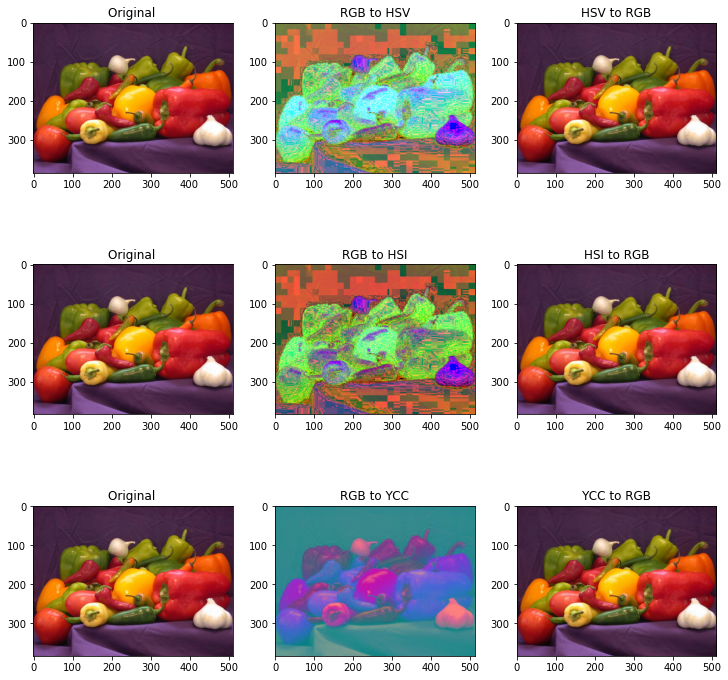

In [37]:
tmp_lena_HSV=lena.copy()

axs = (plt.figure(constrained_layout=True,figsize=(w/40,h/40))
       .subplots(3, 3))

peppers= np.array(Image.open('img/peppers.jpeg'))
#axs[0].imshow((RGB2HSI(peppers)*255.0).astype(np.uint8))
axs[0][0].imshow(peppers)
axs[0][0].set_title('Original ')
axs[0][1].imshow((RGB2HSV(peppers)*255.0).astype(np.uint8))
axs[0][1].set_title('RGB to HSV')
axs[0][2].imshow(HSV2RGB(RGB2HSV(peppers)))
axs[0][2].set_title('HSV to RGB')

axs[1][0].imshow(peppers)
axs[1][0].set_title('Original ')
axs[1][1].imshow((RGB2HSI(peppers)*255.0).astype(np.uint8))
axs[1][1].set_title('RGB to HSI')
axs[1][2].imshow(HSI2RGB(RGB2HSI(peppers)))
axs[1][2].set_title('HSI to RGB')

axs[2][0].imshow(peppers)
axs[2][0].set_title('Original ')
axs[2][1].imshow((rgb2ycbcr(peppers)).astype(np.uint8))
axs[2][1].set_title('RGB to YCC')
axs[2][2].imshow(ycbcr2rgb(rgb2ycbcr(peppers)))
axs[2][2].set_title('YCC to RGB')


Text(0.5, 1.0, 'equalized B channel')

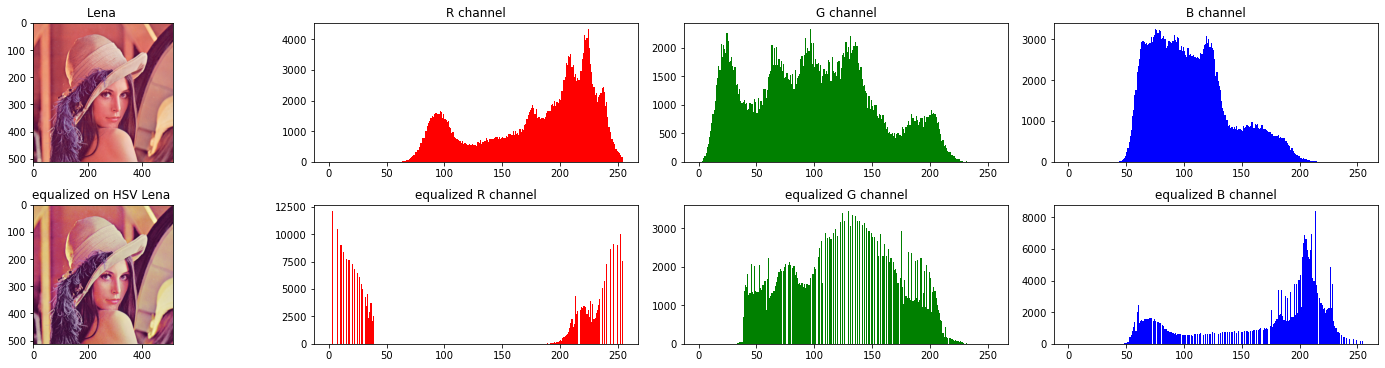

In [38]:


tmp_lena_HSV=lena.copy()
lena_HSV=(mcolors.rgb_to_hsv(lena/255.0)*255).astype(np.uint8)

lena_HSV_hist0 = cumulativeHistogram(lena_HSV[:,:,0].ravel())
lena_HSV_hist1 = cumulativeHistogram(lena_HSV[:,:,1].ravel())
lena_HSV_hist2 = cumulativeHistogram(lena_HSV[:,:,2].ravel())


tmp_HSV_hist =((lena_HSV_hist0+lena_HSV_hist1+lena_HSV_hist1)/3.0).astype(int)

lena_HSV[:,:,0]=histogramEqualization(lena_HSV[:,:,0],tmp_HSV_hist )
lena_HSV[:,:,1]=histogramEqualization(lena_HSV[:,:,1],tmp_HSV_hist)
lena_HSV[:,:,2]=histogramEqualization(lena_HSV[:,:,2],tmp_HSV_hist)

axs = (plt.figure(constrained_layout=True,figsize=(w/20,h/80)).subplots(2, 4))

axs[0][0].imshow(lena)
axs[0][0].set_title('Lena ')
axs[0][1].hist(lena[:,:,0].ravel(),range(256),color='red')
axs[0][1].set_title('R channel')
axs[0][2].hist(lena[:,:,1].ravel(),range(256),color='green')
axs[0][2].set_title('G channel')
axs[0][3].hist(lena[:,:,2].ravel(),range(256),color='blue')
axs[0][3].set_title('B channel')


axs[1][0].imshow((mcolors.hsv_to_rgb(lena_HSV/255.0)*255.0).astype(np.uint8))
axs[1][0].set_title('equalized on HSV Lena ')
axs[1][1].hist(lena_HSV[:,:,0].ravel(),range(256),color='red')
axs[1][1].set_title('equalized R channel')
axs[1][2].hist(lena_HSV[:,:,1].ravel(),range(256),color='green')
axs[1][2].set_title('equalized G channel')
axs[1][3].hist(lena_HSV[:,:,2].ravel(),range(256),color='blue')
axs[1][3].set_title('equalized B channel')

Text(0.5, 1.0, 'equalized B channel')

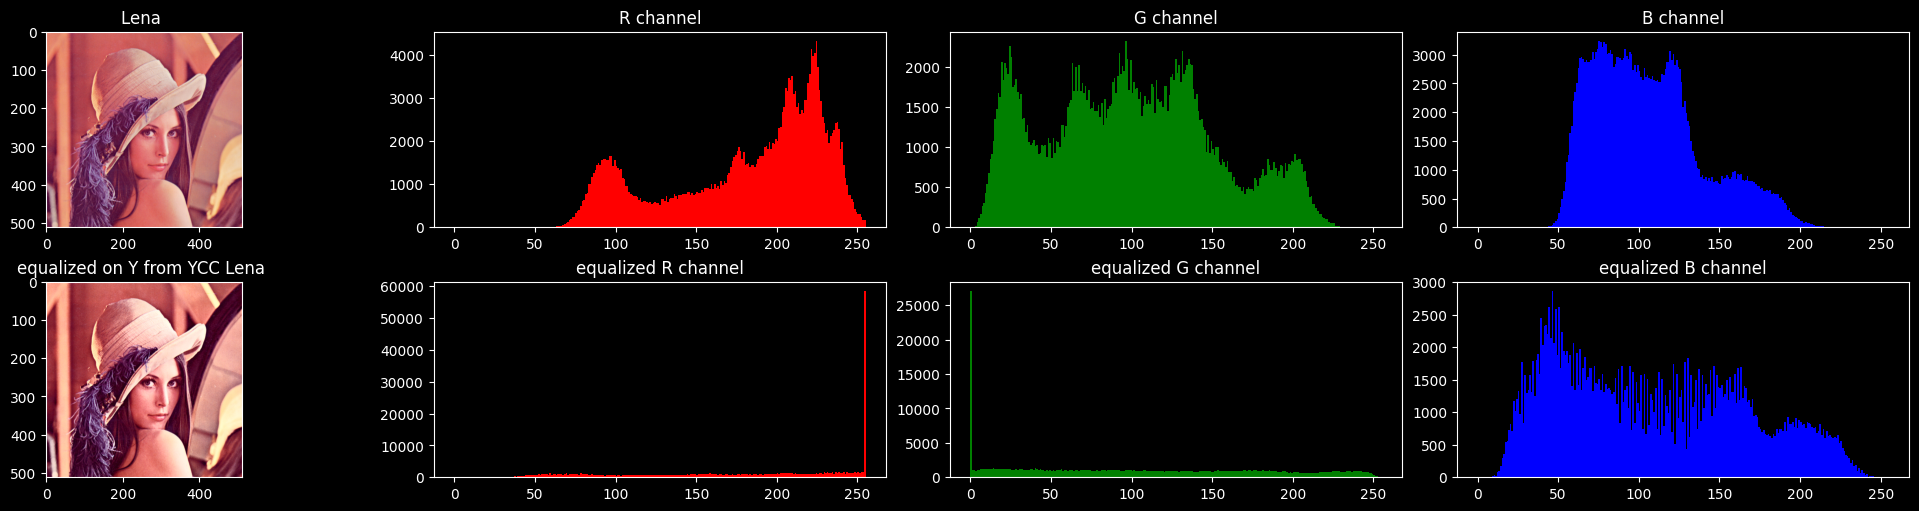

In [81]:
axs = (plt.figure(constrained_layout=True,figsize=(w/20,h/80)).subplots(2, 4))

axs[0][0].imshow(lena)
axs[0][0].set_title('Lena ')
axs[0][1].hist(lena[:,:,0].ravel(),range(256),color='red')
axs[0][1].set_title('R channel')
axs[0][2].hist(lena[:,:,1].ravel(),range(256),color='green')
axs[0][2].set_title('G channel')
axs[0][3].hist(lena[:,:,2].ravel(),range(256),color='blue')
axs[0][3].set_title('B channel')

lena_YCC=imageEqualizationYCC(lena)

axs[1][0].imshow(lena_YCC)
axs[1][0].set_title('equalized on Y from YCC Lena ')
axs[1][1].hist(lena_YCC[:,:,0].ravel(),range(256),color='red')
axs[1][1].set_title('equalized R channel')
axs[1][2].hist(lena_YCC[:,:,1].ravel(),range(256),color='green')
axs[1][2].set_title('equalized G channel')
axs[1][3].hist(lena_YCC[:,:,2].ravel(),range(256),color='blue')
axs[1][3].set_title('equalized B channel')

Text(0.5, 1.0, 'equalized Lena ')

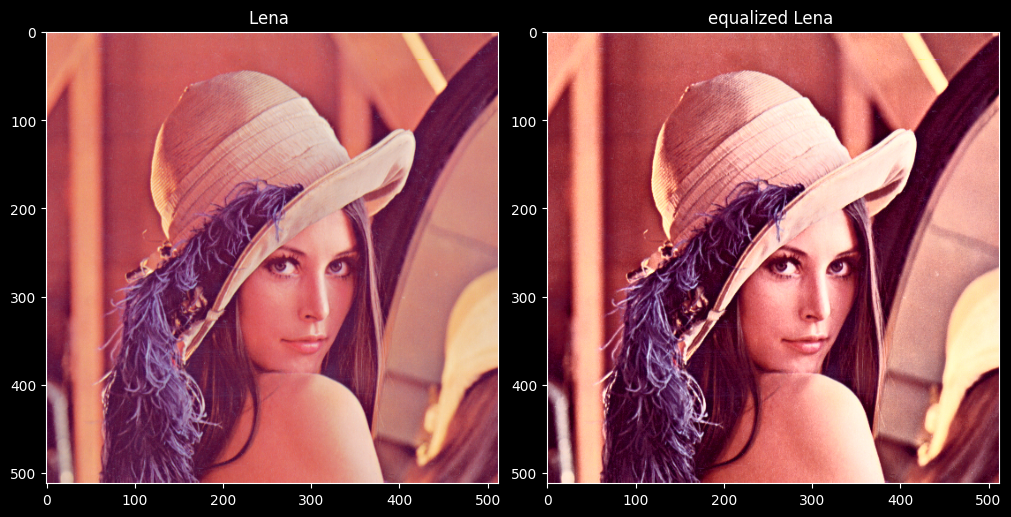

In [75]:
axs = (plt.figure(constrained_layout=True,figsize=(w/40,h/40))
       .subplots(1, 2))
axs[0].imshow(lena)
axs[0].set_title('Lena ')
axs[1].imshow(imageEqualizationYCC(lena))
axs[1].set_title('equalized Lena ')

Text(0.5, 1.0, 'equalized B channel')

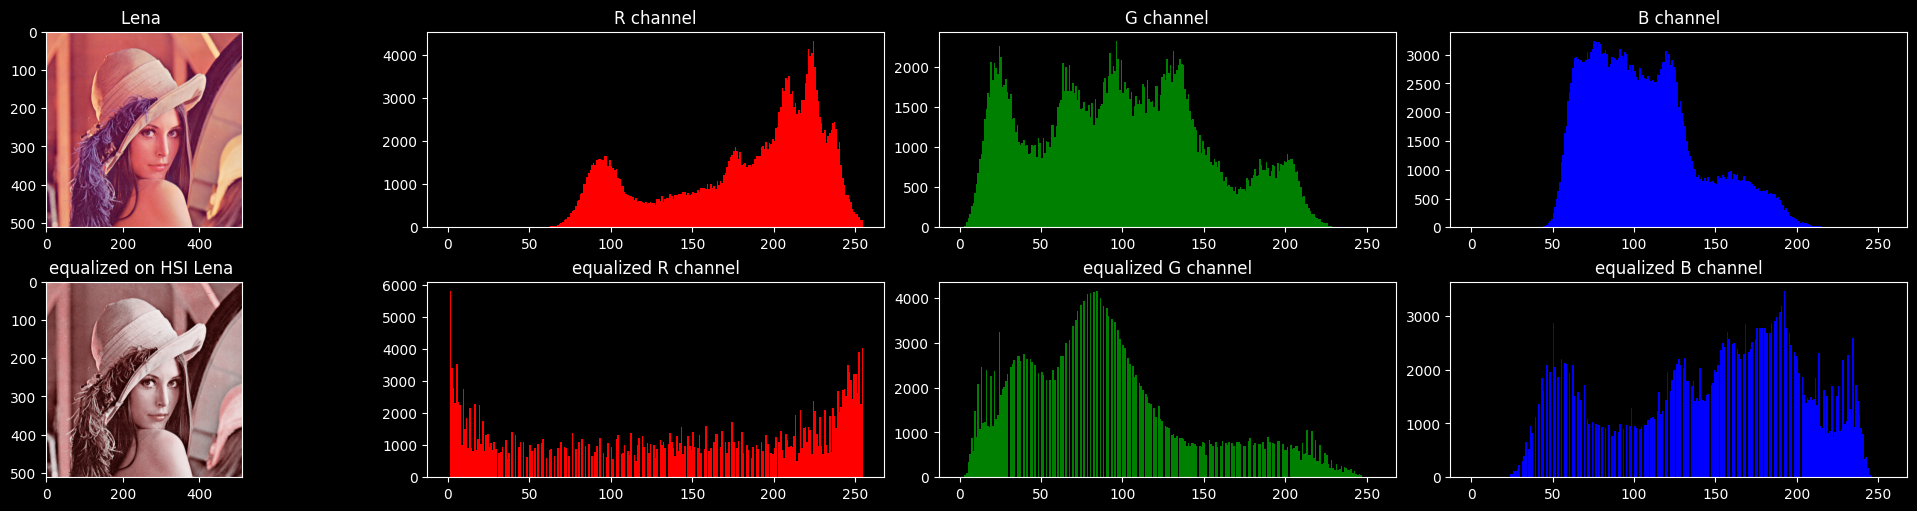

In [76]:
tmp_lena_HSI=lena.copy()
lena_HSI=(RGB2HSI(tmp_lena_HSI)*255).astype(np.uint8)

lena_HSI_hist0 = cumulativeHistogram(lena_HSI[:,:,0].ravel())
lena_HSI_hist1 = cumulativeHistogram(lena_HSI[:,:,1].ravel())
lena_HSI_hist2 = cumulativeHistogram(lena_HSI[:,:,2].ravel())


tmp_HSI_hist =((lena_HSI_hist0+lena_HSI_hist1+lena_HSI_hist2)/3.0).astype(int)
#tmp_HSI_hist =((lena_HSI_hist0+lena_HSI_hist1)/2.0).astype(int)

lena_HSI[:,:,0]=histogramEqualization(lena_HSI[:,:,0],tmp_HSI_hist )
lena_HSI[:,:,1]=histogramEqualization(lena_HSI[:,:,1],tmp_HSI_hist)
lena_HSI[:,:,2]=histogramEqualization(lena_HSI[:,:,2],tmp_HSI_hist)

axs = (plt.figure(constrained_layout=True,figsize=(w/20,h/80)).subplots(2, 4))

axs[0][0].imshow(lena)
axs[0][0].set_title('Lena ')
axs[0][1].hist(lena[:,:,0].ravel(),range(256),color='red')
axs[0][1].set_title('R channel')
axs[0][2].hist(lena[:,:,1].ravel(),range(256),color='green')
axs[0][2].set_title('G channel')
axs[0][3].hist(lena[:,:,2].ravel(),range(256),color='blue')
axs[0][3].set_title('B channel')

axs[1][0].imshow(HSV2RGB(lena_HSI/255.0))
axs[1][0].set_title('equalized on HSI Lena ')
axs[1][1].hist(lena_HSI[:,:,0].ravel(),range(256),color='red')
axs[1][1].set_title('equalized R channel')
axs[1][2].hist(lena_HSI[:,:,1].ravel(),range(256),color='green')
axs[1][2].set_title('equalized G channel')
axs[1][3].hist(lena_HSI[:,:,2].ravel(),range(256),color='blue')
axs[1][3].set_title('equalized B channel')

58.983724593480176
73.61166440253021
73.50585771217649
77.48182405831828
73.54853298821052
76.97661630106059
82.88704673083163


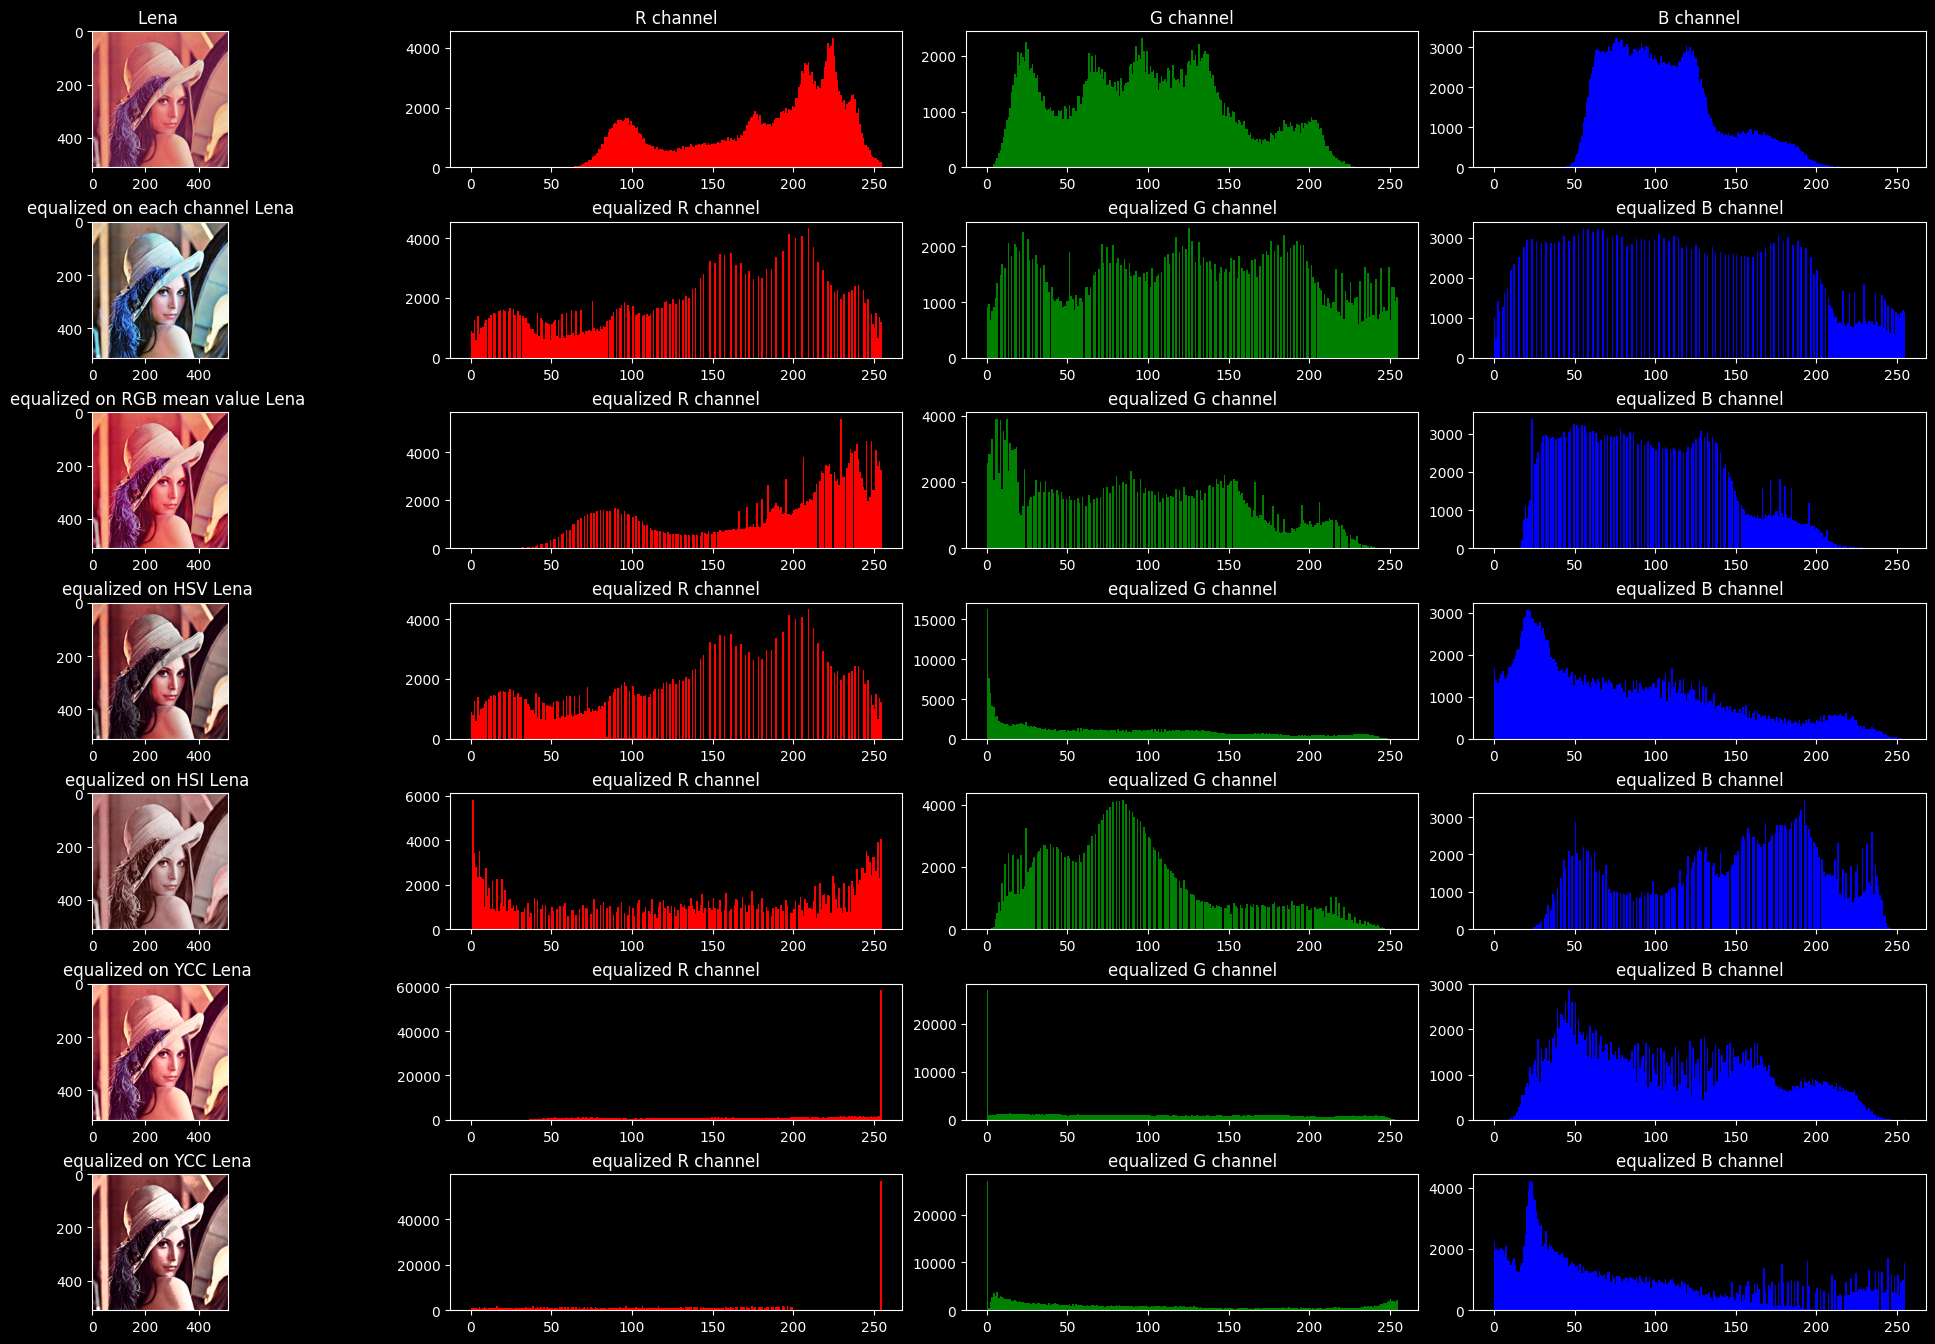

In [124]:
fig = plt.figure(constrained_layout=True,figsize=(w/20,h/30))
axs = fig.subplots(7, 4,sharex=False, sharey=False)

axs[0][0].imshow(lena)
axs[0][0].set_title('Lena ')
axs[0][1].hist(lena[:,:,0].ravel(),range(256),color='red')
axs[0][1].set_title('R channel')
axs[0][2].hist(lena[:,:,1].ravel(),range(256),color='green')
axs[0][2].set_title('G channel')
axs[0][3].hist(lena[:,:,2].ravel(),range(256),color='blue')
axs[0][3].set_title('B channel')

axs[1][0].imshow(tmp_lena)
axs[1][0].set_title('equalized on each channel Lena')
axs[1][1].hist(tmp_lena[:,:,0].ravel(),range(256),color='red')
axs[1][1].set_title('equalized R channel')
axs[1][2].hist(tmp_lena[:,:,1].ravel(),range(256),color='green')
axs[1][2].set_title('equalized G channel')
axs[1][3].hist(tmp_lena[:,:,2].ravel(),range(256),color='blue')
axs[1][3].set_title('equalized B channel')

axs[2][0].imshow(tmp_lena_m)
axs[2][0].set_title('equalized on RGB mean value Lena ')
axs[2][1].hist(tmp_lena_m[:,:,0].ravel(),range(256),color='red')
axs[2][1].set_title('equalized R channel')
axs[2][2].hist(tmp_lena_m[:,:,1].ravel(),range(256),color='green')
axs[2][2].set_title('equalized G channel')
axs[2][3].hist(tmp_lena_m[:,:,2].ravel(),range(256),color='blue')
axs[2][3].set_title('equalized B channel')

tmp_lena_hsv=imageEqualizationHSV(lena)
axs[3][0].imshow(tmp_lena_hsv)
axs[3][0].set_title('equalized on HSV Lena ')
axs[3][1].hist(tmp_lena_hsv[:,:,0].ravel(),range(256),color='red')
axs[3][1].set_title('equalized R channel')
axs[3][2].hist(tmp_lena_hsv[:,:,1].ravel(),range(256),color='green')
axs[3][2].set_title('equalized G channel')
axs[3][3].hist(tmp_lena_hsv[:,:,2].ravel(),range(256),color='blue')
axs[3][3].set_title('equalized B channel')

axs[4][0].imshow(HSV2RGB(lena_HSI/255.0))
axs[4][0].set_title('equalized on HSI Lena ')
axs[4][1].hist(lena_HSI[:,:,0].ravel(),range(256),color='red')
axs[4][1].set_title('equalized R channel')
axs[4][2].hist(lena_HSI[:,:,1].ravel(),range(256),color='green')
axs[4][2].set_title('equalized G channel')
axs[4][3].hist(lena_HSI[:,:,2].ravel(),range(256),color='blue')
axs[4][3].set_title('equalized B channel')

axs[5][0].imshow(imageEqualizationYCC(lena))
axs[5][0].set_title('equalized on YCC Lena ')
axs[5][1].hist(lena_YCC[:,:,0].ravel(),range(256),color='red')
axs[5][1].set_title('equalized R channel')
axs[5][2].hist(lena_YCC[:,:,1].ravel(),range(256),color='green')
axs[5][2].set_title('equalized G channel')
axs[5][3].hist(lena_YCC[:,:,2].ravel(),range(256),color='blue')
axs[5][3].set_title('equalized B channel')

tmp_lena_YCC_HSV=imageEqualizationYCCandHSV(lena)
axs[6][0].imshow(tmp_lena_YCC_HSV)
axs[6][0].set_title('equalized on YCC Lena ')
axs[6][1].hist(tmp_lena_YCC_HSV[:,:,0].ravel(),range(256),color='red')
axs[6][1].set_title('equalized R channel')
axs[6][2].hist(tmp_lena_YCC_HSV[:,:,1].ravel(),range(256),color='green')
axs[6][2].set_title('equalized G channel')
axs[6][3].hist(tmp_lena_YCC_HSV[:,:,2].ravel(),range(256),color='blue')
axs[6][3].set_title('equalized B channel')

#plt.savefig("results/Enhancement_on_RGB.png", dpi=800)
print(np.std(lena))
print(np.std(tmp_lena))
print(np.std(tmp_lena_m))
print(np.std(lena_HSV))
print(np.std(lena_HSI))
print(np.std(lena_YCC))
print(np.std(tmp_lena_YCC_HSV))


In [116]:
def Recap(images_list):
    fig = plt.figure(constrained_layout=True,figsize=(w/20,h/35))
    axs = fig.subplots(len(images_list), 6,sharex=False, sharey=False)

    for i in range(len(images_list)):
        tmp_image=np.array(Image.open("img/"+images_list[i]))
        axs[i][0].imshow(tmp_image)
        axs[i][0].set_xlabel("std="+str(np.around(np.std(tmp_image),2)))
        if (i==0):
            axs[i][0].set_title("original")
            axs[i][1].set_title("independent RGB channels")
            axs[i][2].set_title("mean RGB")
            axs[i][3].set_title("mean HSV")
            #axs[i][4].set_title("mean HSI")
            axs[i][4].set_title("equalized on YCC")
            axs[i][5].set_title("Y + HSV")
        tmp_rgb=ImageEqualizationRGB(tmp_image)
        axs[i][1].imshow(tmp_rgb)
        axs[i][1].set_xlabel("std="+str(np.around( np.std(tmp_rgb),2)))
        #axs[i][0].set_title('Lena ')
        tmp_rgb_mean=ImageEqualizationRGBMean(tmp_image)
        axs[i][2].imshow(tmp_rgb_mean)
        axs[i][2].set_xlabel("std="+str(np.around(np.std(tmp_rgb_mean),2)))
        tmp_hsv=imageEqualizationHSV(tmp_image)
        axs[i][3].imshow(tmp_hsv)
        axs[i][3].set_xlabel("std="+str(np.around(np.std(tmp_hsv),2)))
        #axs[i][4].imshow(imageEqualizationHSI(tmp_image))
        tmp_YCC=imageEqualizationYCC(tmp_image)
        axs[i][4].imshow(tmp_YCC)
        axs[i][4].set_xlabel("std="+str(np.around(np.std(tmp_YCC),2)))
        tmp_YCC_HSV=imageEqualizationYCCandHSV(tmp_image)
        axs[i][5].imshow(tmp_YCC_HSV)
        axs[i][5].set_xlabel("std="+str(np.around(np.std(tmp_YCC_HSV),2)))
       
        

    

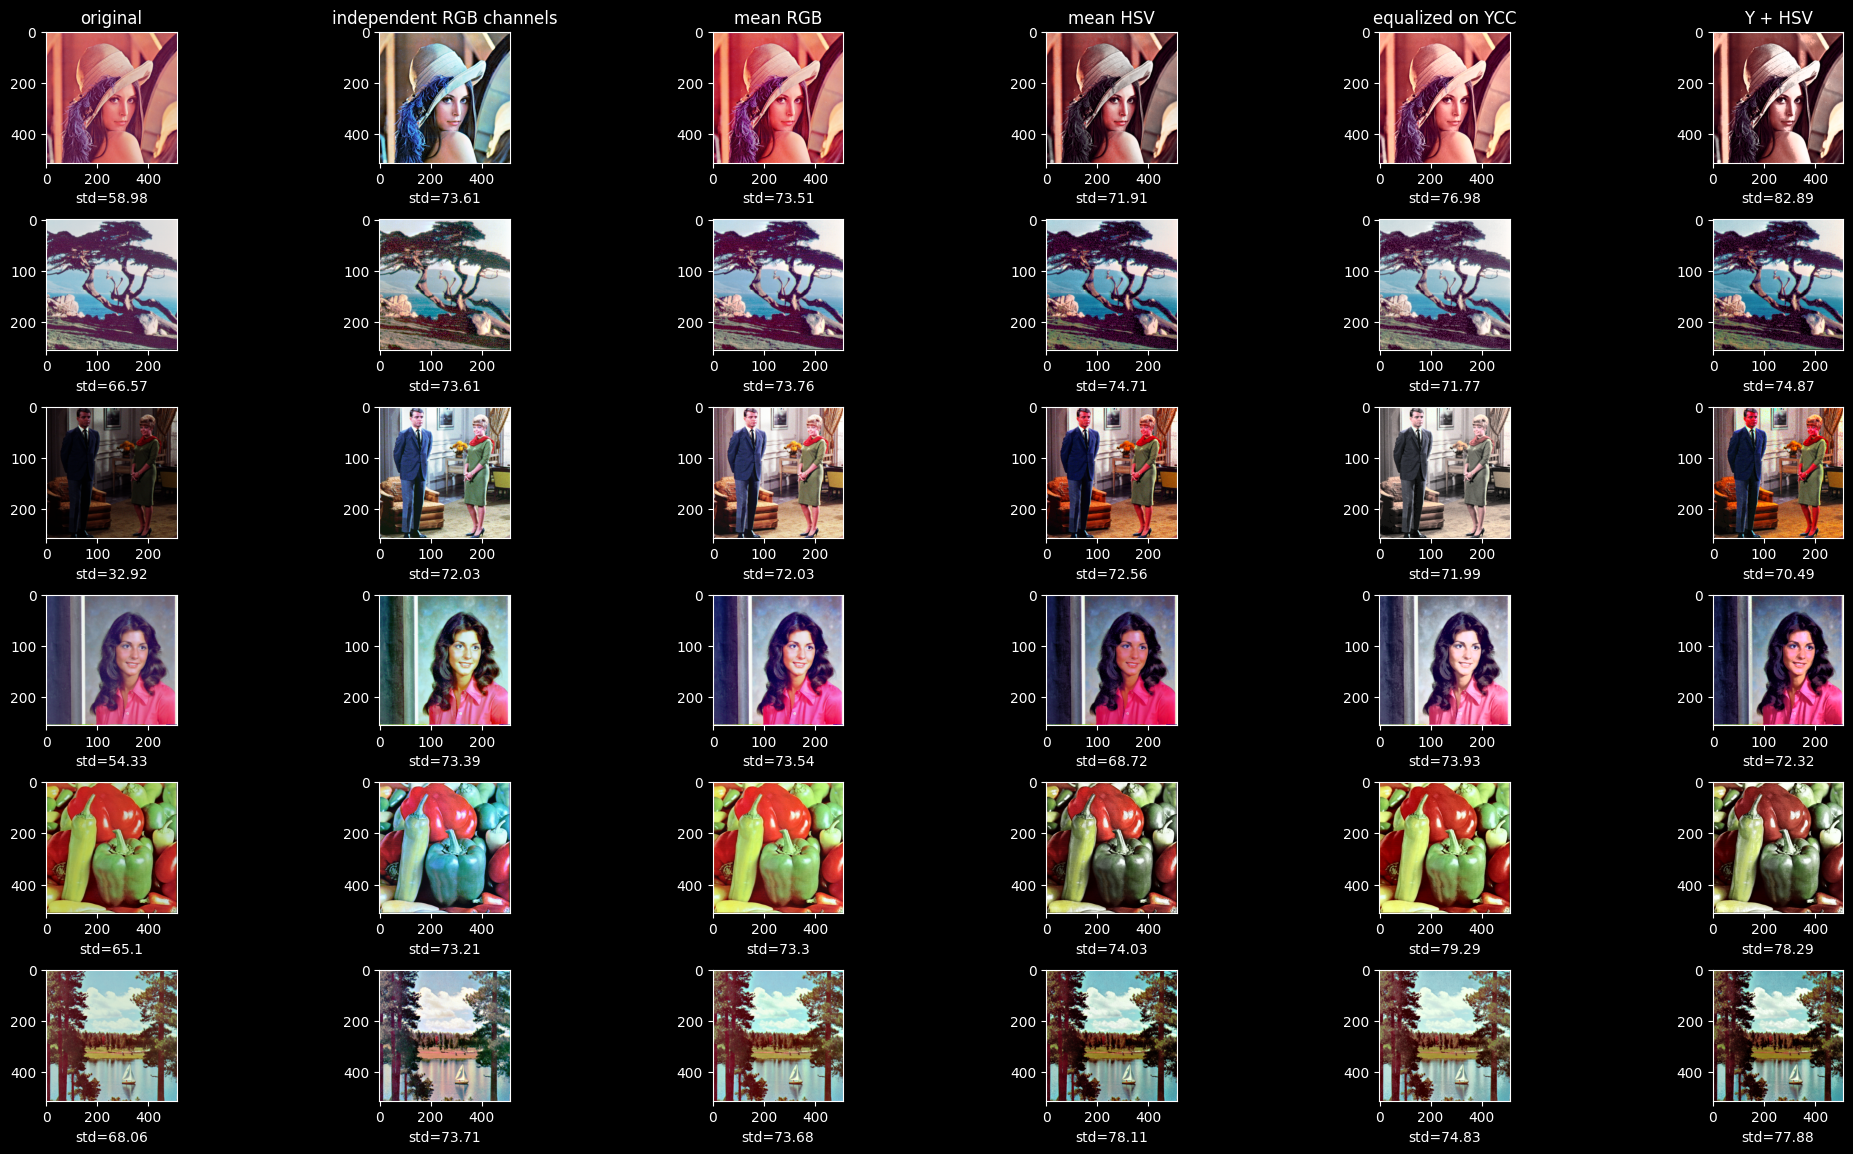

In [123]:
Recap(["lena_std.tiff","Tree.tiff","Women1.tiff","Women2.tiff","peppers3.tiff","lake.tiff"])

Dans cette dernière partie nous avons amélioré le contraste d'une image avec plusieurs approches. Calculer les écarts-types pour chaque méthode nous a permis de comparer l'éfficacité de chaque algorithme.


| Traitement    |  original |   Equalization on each RGB channel  |   Equalization on the mean of RGB channels |    Equalization on HSV channels|  Equalization on YCbCr channels |  Equalization on YCC -> HSV | 
| ------------- |:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
| Lena     | 58.98 | 73.61 | 73.51 | 71.91 | 76.98 | **82.89** | 
| Tree     | 66.57 | 73.61 | 73.76 | 74.71 | 71.77 | **74.87** | 
| Movie Scene | 32.92 | 72.03 | 72.03 | **72.56** | 71.99 | 70.49 | 
| Women | 54.33 | 73.39 | 73.54 | 68.72 | **73.93** | 72.32 |  
| Peppers | 65.1 | 73.21 | 73.3 | 74.03 | **79.29** | 78.29 | 
| Lake  | 68.06 | 73.71 | 73.68 | **78.71** | 74.83 | 77.88 | 

#### Egalisation en fonction de chaque canal RGB

Cette méthode conciste à égaliser chaque canal R,G,B de l'image de manière indépendante. C'est la moins bonne car elle ignore le fait que les canaux RGB sont très corrélés (puisque chaque couleur présente sur l'image est une combinaison des 3).

#### Egalisation en fonction de la moyenne des canaux RGB

Cette méthode est meilleure que la précédente,

#### Egalisation en fonction des canaux HSV
#### Egalisation en fonction des canaux YCrCb
#### Egalisation YCC puis Egalisation des canaux HSV
